In [4]:
# Импорт

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    StackingClassifier
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, confusion_matrix,
    classification_report, roc_curve, precision_recall_curve
)
from sklearn.inspection import permutation_importance

import joblib
import json
import os

# Настройки отображения
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

=== head() ===


,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,num10,num11,num12,num13,num14,num15,num16,num17,num18,num19,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
0,1,-0.946058,-0.070313,1.824445,-2.754422,0.808865,-0.111094,-0.268950,-3.078210,0.801275,-0.417059,0.799265,-1.484333,1.645497,1.519635,-1.259234,3.095407,-0.683026,1.152902,0.150213,-1.616515,-1.989464,1.407390,-0.218362,2.016052,0,2,3,33,0
1,2,-2.484027,0.739378,1.596908,-2.586479,-0.033225,-3.054412,-4.706908,-9.795169,0.145911,-1.122641,-0.313923,-1.298557,4.402595,0.552276,-0.006363,-0.729615,1.072416,2.654621,1.955462,-1.727040,-0.583997,1.136761,0.285978,-0.310879,2,2,2,102,1
2,3,1.522629,7.159635,-0.564903,-4.493110,1.623610,5.450187,-0.974595,-5.189589,1.600591,-0.477243,-0.839634,0.413097,3.277826,0.930134,1.219061,0.682610,2.587941,2.422656,-0.573642,0.524408,2.022430,1.278358,-0.850547,0.847457,1,0,2,3,0
3,4,0.463373,-1.073908,1.752813,0.362786,2.790872,4.082385,0.322283,3.390984,-0.033929,1.149337,0.604785,-0.090661,-0.797300,-0.201065,0.217428,4.598689,1.145859,-2.446382,1.809714,2.399834,-1.431576,-0.746987,0.049639,2.414689,1,0,1,50,0
4,5,3.188390,-4.701692,-0.689918,-0.448995,0.373821,-3.275363,-1.760931,0.923689,0.537345,1.113718,1.171501,-0.143172,3.479856,-1.095421,-1.402469,1.620111,-0.956420,-0.757656,0.289182,-2.183407,-2.896590,2.440343,-1.097168,1.457323,1,2,3,81,0



=== info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12000 non-null  int64  
 1   num01          12000 non-null  float64
 2   num02          12000 non-null  float64
 3   num03          12000 non-null  float64
 4   num04          12000 non-null  float64
 5   num05          12000 non-null  float64
 6   num06          12000 non-null  float64
 7   num07          12000 non-null  float64
 8   num08          12000 non-null  float64
 9   num09          12000 non-null  float64
 10  num10          12000 non-null  float64
 11  num11          12000 non-null  float64
 12  num12          12000 non-null  float64
 13  num13          12000 non-null  float64
 14  num14          12000 non-null  float64
 15  num15          12000 non-null  float64
 16  num16          12000 non-null  float64
 17  num17          12000 non-null  flo

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,num10,num11,num12,num13,num14,num15,num16,num17,num18,num19,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,0.013705,-0.005278,-0.002357,0.038404,-0.006301,-0.865297,-0.702877,-0.290694,-0.008154,0.010048,0.007073,0.006342,0.017795,0.347185,-0.018276,0.409508,0.696832,-0.691558,0.315658,-0.323083,-1.314833,0.319798,-0.002742,0.027459,0.988750,1.990167,1.506833,36.083833,0.323417
std,3464.24595,2.096534,3.544498,1.004417,2.087318,1.007329,3.888966,1.989513,3.455981,0.996677,0.991551,0.993499,1.003787,3.597580,2.178166,0.997173,3.415142,2.088933,1.783099,1.967470,2.167066,3.731384,2.223649,0.996454,1.882359,0.815687,1.411643,1.121558,25.061218,0.467800
min,1.00000,-8.155181,-14.605579,-4.374043,-7.753301,-3.999332,-15.238402,-7.377252,-13.853627,-3.794637,-3.744778,-3.869569,-3.622471,-13.263468,-8.425311,-3.841796,-11.469117,-7.635916,-7.518069,-8.128531,-8.371050,-14.249204,-8.638879,-3.532093,-7.923990,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,-1.423844,-2.303772,-0.685618,-1.374579,-0.676552,-3.532054,-2.064888,-2.597019,-0.683959,-0.650821,-0.664891,-0.676353,-2.437919,-1.169568,-0.695665,-1.940763,-0.664131,-1.843582,-0.838522,-1.808969,-3.863063,-1.097700,-0.676150,-1.110822,0.000000,1.000000,0.000000,17.000000,0.000000
50%,6000.50000,-0.047565,0.053348,-0.009186,0.038766,-0.003728,-1.092517,-0.795907,-0.208245,-0.020883,0.012795,0.013577,0.007671,0.104955,0.361059,-0.018554,0.392645,0.745641,-0.718709,0.460720,-0.383940,-1.393400,0.431804,0.006297,0.279689,1.000000,2.000000,2.000000,30.000000,0.000000
75%,9000.25000,1.422676,2.335937,0.671441,1.484417,0.669269,1.526389,0.522625,2.093169,0.666959,0.678816,0.677044,0.692959,2.581472,1.844073,0.656497,2.719667,2.102469,0.468209,1.621416,1.125140,1.116111,1.853491,0.657478,1.363896,2.000000,3.000000,3.000000,49.000000,1.000000
max,12000.00000,8.610863,16.299709,3.651692,7.571965,4.562115,16.223054,8.006444,13.030011,3.976868,3.678191,3.665229,3.607966,12.873170,9.151368,3.644306,14.273800,8.608623,6.117500,8.960737,7.957847,15.937281,8.102095,3.707905,7.549514,2.000000,4.000000,3.000000,120.000000,1.000000



=== Пропуски ===
id               0
num01            0
num02            0
num03            0
num04            0
num05            0
num06            0
num07            0
num08            0
num09            0
num10            0
num11            0
num12            0
num13            0
num14            0
num15            0
num16            0
num17            0
num18            0
num19            0
num20            0
num21            0
num22            0
num23            0
num24            0
cat_contract     0
cat_region       0
cat_payment      0
tenure_months    0
target           0
dtype: int64

=== Распределение target ===
target
0    0.676583
1    0.323417
Name: proportion, dtype: float64


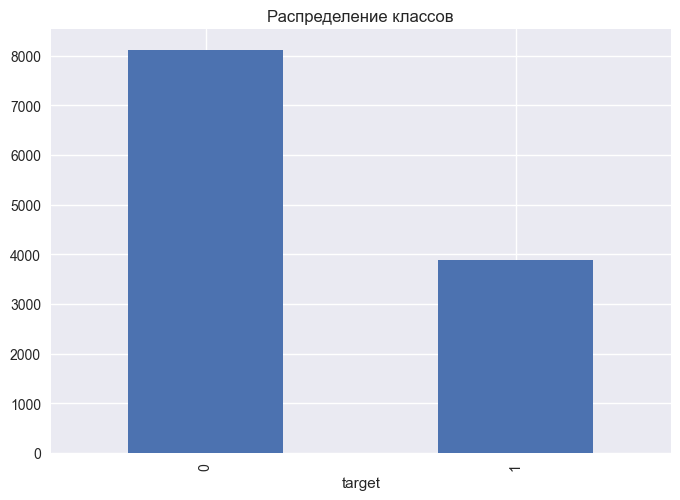

In [5]:
# Загрузка данных и первичный анализ

# Загрузка
df = pd.read_csv("S06-hw-dataset-01.csv")

# Первичный осмотр
print("=== head() ===")
display(df.head())
print("\n=== info() ===")
df.info()
print("\n=== describe() ===")
display(df.describe(include='all'))

# Пропуски
print("\n=== Пропуски ===")
print(df.isnull().sum())

# Распределение таргета
print("\n=== Распределение target ===")
print(df['target'].value_counts(normalize=True))
df['target'].value_counts().plot(kind='bar')
plt.title('Распределение классов')
plt.show()

In [6]:
# Разделение x (признаки)/ y (target)

x = df.drop(columns=['id', 'target'])
y = df['target']

In [7]:
# Train/Test split

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [8]:
# Baseline-модели

# Baseline 1: Пустышка (наиболее часто встречающаяся) (Dummy most frequent)
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(x_train, y_train)
y_pred_dummy = dummy.predict(x_test)

# Baseline 2: Логистическая регрессия (Logistic Regression)
lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42, max_iter=1000))
])
lr_pipe.fit(x_train, y_train)
y_pred_lr = lr_pipe.predict(x_test)
y_proba_lr = lr_pipe.predict_proba(x_test)[:, 1]

# Метрики
def eval_model(y_true, y_pred, y_proba=None, name=""):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_proba) if y_proba is not None else None
    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1:       {f1:.4f}")
    if auc is not None:
        print(f"ROC-AUC:  {auc:.4f}")

eval_model(y_test, y_pred_dummy, None, "Dummy (most frequent)")
eval_model(y_test, y_pred_lr, y_proba_lr, "Logistic Regression")


Dummy (most frequent)
Accuracy: 0.6767
F1:       0.0000

Logistic Regression
Accuracy: 0.8275
F1:       0.7076
ROC-AUC:  0.8747


In [9]:
# Модели недели 6
#DecisionTree

# Подбор гиперпараметров
dt_params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [2, 5, 10]
}
dt = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='f1')
dt_grid.fit(x_train, y_train)

print("Best DT params:", dt_grid.best_params_)
y_pred_dt = dt_grid.predict(x_test)
y_proba_dt = dt_grid.predict_proba(x_test)[:, 1]
eval_model(y_test, y_pred_dt, y_proba_dt, "Decision Tree")

Best DT params: {'max_depth': 10, 'min_samples_leaf': 5}

Decision Tree
Accuracy: 0.8721
F1:       0.7924
ROC-AUC:  0.8950


In [10]:
# RandomForest

rf_params = {
    'n_estimators': [100],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [2, 5]
}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1')
rf_grid.fit(x_train, y_train)

print("Best RF params:", rf_grid.best_params_)
y_pred_rf = rf_grid.predict(x_test)
y_proba_rf = rf_grid.predict_proba(x_test)[:, 1]
eval_model(y_test, y_pred_rf, y_proba_rf, "Random Forest")

Best RF params: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}

Random Forest
Accuracy: 0.9246
F1:       0.8775
ROC-AUC:  0.9648


In [11]:
# Gradient Boosting (Hist)

gb_params = {
    'max_iter': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}
gb = HistGradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='f1')
gb_grid.fit(x_train, y_train)

print("Best GB params:", gb_grid.best_params_)
y_pred_gb = gb_grid.predict(x_test)
y_proba_gb = gb_grid.predict_proba(x_test)[:, 1]
eval_model(y_test, y_pred_gb, y_proba_gb, "HistGradientBoosting")

Best GB params: {'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 200}

HistGradientBoosting
Accuracy: 0.9300
F1:       0.8887
ROC-AUC:  0.9694


In [12]:
# Stacking

estimators = [
    ('dt', dt_grid.best_estimator_),
    ('rf', rf_grid.best_estimator_),
    ('gb', gb_grid.best_estimator_)
]
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)
stack.fit(x_train, y_train)

y_pred_stack = stack.predict(x_test)
y_proba_stack = stack.predict_proba(x_test)[:, 1]
eval_model(y_test, y_pred_stack, y_proba_stack, "Stacking")


Stacking
Accuracy: 0.9333
F1:       0.8953
ROC-AUC:  0.9697


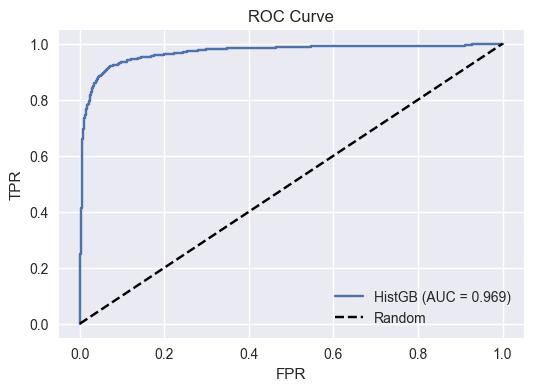

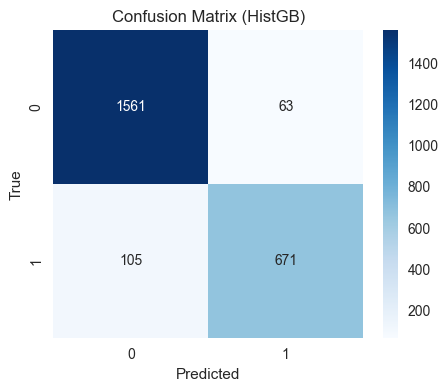

In [13]:
# Метрики и графики

# ROC-кривая (пример для лучшей модели — допустим, gb)
fpr, tpr, _ = roc_curve(y_test, y_proba_gb)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"HistGB (AUC = {roc_auc_score(y_test, y_proba_gb):.3f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.savefig("artifacts/figures/roc_curve.png", bbox_inches='tight')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (HistGB)")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.savefig("artifacts/figures/confusion_matrix.png", bbox_inches='tight')
plt.show()

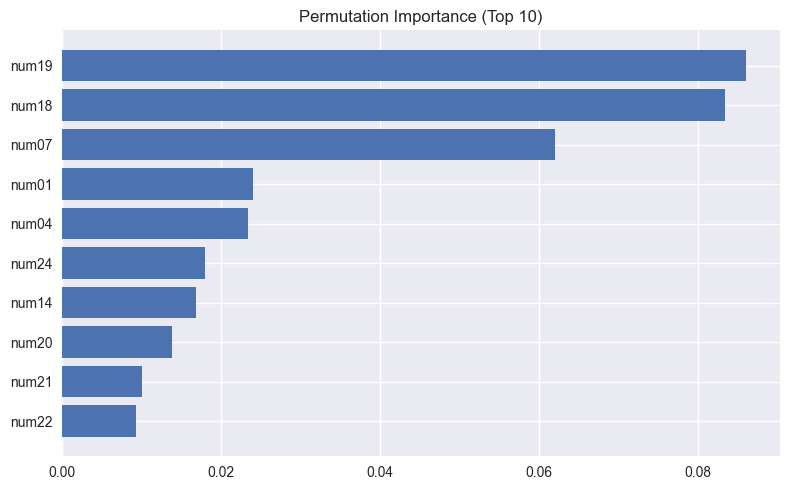

In [14]:
# Интерпретация: Permutation Importance

perm_imp = permutation_importance(
    gb_grid.best_estimator_, x_test, y_test,
    n_repeats=10, random_state=42, n_jobs=-1
)

# Топ-10
indices = np.argsort(perm_imp.importances_mean)[::-1][:10]
plt.figure(figsize=(8, 5))
plt.barh(range(10), perm_imp.importances_mean[indices])
plt.yticks(range(10), [x.columns[i] for i in indices])
plt.gca().invert_yaxis()
plt.title("Permutation Importance (Top 10)")
plt.tight_layout()
plt.savefig("artifacts/figures/permutation_importance.png", bbox_inches='tight')
plt.show()

In [15]:
# Сохранение артефактов

# Финальные метрики по всем моделям
models = {
    'dummy': (y_pred_dummy, None),
    'logistic': (y_pred_lr, y_proba_lr),
    'decision_tree': (y_pred_dt, y_proba_dt),
    'random_forest': (y_pred_rf, y_proba_rf),
    'hist_gradient_boosting': (y_pred_gb, y_proba_gb),
    'stacking': (y_pred_stack, y_proba_stack)
}

metrics = {}
for name, (pred, proba) in models.items():
    metrics[name] = {
        'accuracy': float(accuracy_score(y_test, pred)),
        'f1': float(f1_score(y_test, pred)),
        'roc_auc': float(roc_auc_score(y_test, proba)) if proba is not None else None
    }

# Сохранение
os.makedirs("artifacts", exist_ok=True)

# metrics_test.json
with open("artifacts/metrics_test.json", "w") as f:
    json.dump(metrics, f, indent=4)

# search_summaries.json
search_summaries = {
    'decision_tree': {
        'best_params': dt_grid.best_params_,
        'best_score': float(dt_grid.best_score_)
    },
    'random_forest': {
        'best_params': rf_grid.best_params_,
        'best_score': float(rf_grid.best_score_)
    },
    'hist_gradient_boosting': {
        'best_params': gb_grid.best_params_,
        'best_score': float(gb_grid.best_score_)
    }
}
with open("artifacts/search_summaries.json", "w") as f:
    json.dump(search_summaries, f, indent=4)

# Лучшая модель (по ROC-AUC)
best_model_name = max(
    [(name, m['roc_auc']) for name, m in metrics.items() if m['roc_auc'] is not None],
    key=lambda x: x[1]
)[0]
best_model = {
    'dummy': dummy,
    'logistic': lr_pipe,
    'decision_tree': dt_grid.best_estimator_,
    'random_forest': rf_grid.best_estimator_,
    'hist_gradient_boosting': gb_grid.best_estimator_,
    'stacking': stack
}[best_model_name]

joblib.dump(best_model, "artifacts/best_model.joblib")

with open("artifacts/best_model_meta.json", "w") as f:
    json.dump({
        'best_model': best_model_name,
        'metrics': metrics[best_model_name],
        'params': search_summaries.get(best_model_name, {}).get('best_params', 'N/A')
    }, f, indent=4)

In [17]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred_stack)
print(cm)

[[1556   68]
 [  92  684]]


In [18]:
# Permutation importance

perm_imp = permutation_importance(stack, x_test, y_test, n_repeats=10, random_state=42)
indices = perm_imp.importances_mean.argsort()[::-1][:5]
for i in indices:
    print(f"{x.columns[i]}: {perm_imp.importances_mean[i]:.3f}")


num19: 0.090
num18: 0.084
num07: 0.059
num04: 0.024
num01: 0.021
